In [9]:
import numpy as np

X = np.linspace(-3, 5)
y = X ** 2 + 1

X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

print(X[0])
print(y[0])


[-3.]
[10.]


In [14]:

import torch
from torch import nn
from torch import optim


class TorchModel(nn.Module):
    def __init__(self,  input_features, output_features):
        super().__init__()

        self.layer1 = nn.Linear(input_features, 8)
        self.layer2 = nn.Linear(8, 16)
        self.layer3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, output_features)

    def forward(self, X):
        X = self.layer1(X)
        X = nn.ReLU()(X)
        X = self.layer2(X)
        X = nn.ReLU()(X)
        X = self.layer3(X)
        X = nn.ReLU()(X)
        output = self.output(X)
        return output


m = TorchModel(1, 1)

def train_torch(X, y, epochs=20000):
    for epoch in range(epochs):

        optimizer = optim.Adam(m.parameters(), lr=1e-4)

        out = m.forward(X)
        criterion = nn.MSELoss()
        loss = criterion(out, y)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Xt = torch.from_numpy(X).float()
yt = torch.from_numpy(y).float()

train_torch(Xt, yt)


Epoch [100/20000], Loss: 107.6131
Epoch [200/20000], Loss: 106.8414
Epoch [300/20000], Loss: 106.3282
Epoch [400/20000], Loss: 105.7256
Epoch [500/20000], Loss: 105.0050
Epoch [600/20000], Loss: 104.1449
Epoch [700/20000], Loss: 103.1341
Epoch [800/20000], Loss: 101.9565
Epoch [900/20000], Loss: 100.5760
Epoch [1000/20000], Loss: 98.9691
Epoch [1100/20000], Loss: 97.1180
Epoch [1200/20000], Loss: 94.9947
Epoch [1300/20000], Loss: 92.5711
Epoch [1400/20000], Loss: 89.8245
Epoch [1500/20000], Loss: 86.7512
Epoch [1600/20000], Loss: 83.3404
Epoch [1700/20000], Loss: 79.5860
Epoch [1800/20000], Loss: 75.4871
Epoch [1900/20000], Loss: 71.0492
Epoch [2000/20000], Loss: 66.2797
Epoch [2100/20000], Loss: 61.0994
Epoch [2200/20000], Loss: 55.5280
Epoch [2300/20000], Loss: 49.6923
Epoch [2400/20000], Loss: 43.6607
Epoch [2500/20000], Loss: 37.5736
Epoch [2600/20000], Loss: 31.5884
Epoch [2700/20000], Loss: 25.9040
Epoch [2800/20000], Loss: 20.7554
Epoch [2900/20000], Loss: 16.4323
Epoch [3000/20

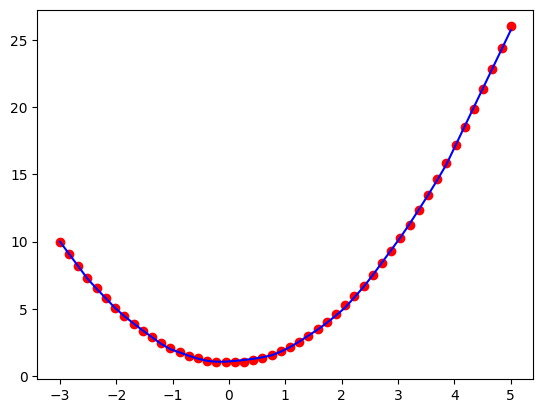

In [15]:
import matplotlib.pyplot as plt

trained = m.forward(Xt)

y_pred_np = trained.detach().numpy()

plt.scatter(X, y ,color='red')
plt.plot(X, y_pred_np, color='blue')
plt.show()
